In [10]:
import gymnasium as gym
from stable_baselines3 import A2C,PPO,DQN
import sumo_rl
from stable_baselines3.common.monitor import Monitor
import numpy as np

In [2]:
env = sumo_rl.parallel_env(
    net_file="grid4x4.net.xml",
    route_file="grid4x4.rou.xml",
    use_gui=True,
    num_seconds=1000,
    reward_fn="average-speed")

C:\Users\hamed\anaconda3\Lib\site-packages\pettingzoo\utils\conversions.py:132: UserWarning: The base environment `sumo_rl_v0` does not have a `render_mode` defined.
  warnings.warn(


In [6]:
total=0
totals=[]
for episode in range(200):
    observations = env.reset()
    terminations, truncations=False,False
    while not terminations and not truncations:
        actions = {agent: env.action_space(agent).sample() for agent in env.agents}  # this is where you would insert your policy
        observations, rewards, terminations, truncations, infos = env.step(actions)
        terminations=any(terminations.values())
        truncations=any(truncations.values())
        rewards=dict(rewards)
        for k,v in rewards.items():
            total+=v
    else:
        totals.append(total)
        total=0
totals=[i/16 for i in totals]

FatalTraCIError: Connection closed by SUMO.

In [47]:
data=dict()
x=list(np.arange(0,60000,300))
data["timesteps"]=x
data["reward"]=totals

In [52]:
def my_reward_fn(self):
        wait_time_per_lane = 0
        for lane in self.lanes:
            veh_list = self.sumo.lane.getLastStepVehicleIDs(lane)
            wait_time = 0.0
            for veh in veh_list:
                veh_lane = self.sumo.vehicle.getLaneID(veh)
                acc = self.sumo.vehicle.getAccumulatedWaitingTime(veh)
                if veh not in self.env.vehicles:
                    self.env.vehicles[veh] = {veh_lane: acc}
                else:
                    self.env.vehicles[veh][veh_lane] = acc - sum([self.env.vehicles[veh][lane] for lane in self.env.vehicles[veh].keys() if lane != veh_lane])
                wait_time += self.env.vehicles[veh][veh_lane]
            wait_time_per_lane+=wait_time
        return -wait_time_per_lane

In [2]:
env = gym.make(
    "sumo-rl-v0",
    num_seconds=200,
    use_gui=False,
    net_file="grid4x4.net.xml",
    route_file="grid4x4.rou.xml",
    reward_fn="average-speed",

)
env=Monitor(env,"./logs")

In [3]:
model = DQN("MlpPolicy",
            env,
            batch_size=320,
            tau=0.6,
            verbose=1)
model.learn(total_timesteps=50000)

Using cpu device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 26       |
|    exploration_rate | 0.97     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 10       |
|    time_elapsed     | 15       |
|    total_timesteps  | 160      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 26.2     |
|    exploration_rate | 0.939    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 11       |
|    time_elapsed     | 28       |
|    total_timesteps  | 320      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 26.8     |
|    exploration_rate | 0.909    |
| t

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.7     |
|    exploration_rate | 0.301    |
| time/               |          |
|    episodes         | 92       |
|    fps              | 11       |
|    time_elapsed     | 321      |
|    total_timesteps  | 3680     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.6     |
|    exploration_rate | 0.27     |
| time/               |          |
|    episodes         | 96       |
|    fps              | 11       |
|    time_elapsed     | 335      |
|    total_timesteps  | 3840     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.7     |
|    exploration_rate | 0.24     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 180      |
|    fps              | 11       |
|    time_elapsed     | 653      |
|    total_timesteps  | 7200     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 184      |
|    fps              | 11       |
|    time_elapsed     | 665      |
|    total_timesteps  | 7360     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 11       |
|    time_elapsed     | 921      |
|    total_timesteps  | 10720    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 272      |
|    fps              | 11       |
|    time_elapsed     | 935      |
|    total_timesteps  | 10880    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 356      |
|    fps              | 11       |
|    time_elapsed     | 1203     |
|    total_timesteps  | 14240    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 360      |
|    fps              | 11       |
|    time_elapsed     | 1215     |
|    total_timesteps  | 14400    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 444      |
|    fps              | 12       |
|    time_elapsed     | 1478     |
|    total_timesteps  | 17760    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 448      |
|    fps              | 12       |
|    time_elapsed     | 1490     |
|    total_timesteps  | 17920    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 532      |
|    fps              | 12       |
|    time_elapsed     | 1741     |
|    total_timesteps  | 21280    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 536      |
|    fps              | 12       |
|    time_elapsed     | 1753     |
|    total_timesteps  | 21440    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 620      |
|    fps              | 12       |
|    time_elapsed     | 2000     |
|    total_timesteps  | 24800    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 624      |
|    fps              | 12       |
|    time_elapsed     | 2012     |
|    total_timesteps  | 24960    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 708      |
|    fps              | 12       |
|    time_elapsed     | 2260     |
|    total_timesteps  | 28320    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 712      |
|    fps              | 12       |
|    time_elapsed     | 2272     |
|    total_timesteps  | 28480    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 796      |
|    fps              | 12       |
|    time_elapsed     | 2519     |
|    total_timesteps  | 31840    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 800      |
|    fps              | 12       |
|    time_elapsed     | 2531     |
|    total_timesteps  | 32000    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 884      |
|    fps              | 12       |
|    time_elapsed     | 2779     |
|    total_timesteps  | 35360    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 888      |
|    fps              | 12       |
|    time_elapsed     | 2791     |
|    total_timesteps  | 35520    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 972      |
|    fps              | 12       |
|    time_elapsed     | 3087     |
|    total_timesteps  | 38880    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 976      |
|    fps              | 12       |
|    time_elapsed     | 3102     |
|    total_timesteps  | 39040    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1060     |
|    fps              | 12       |
|    time_elapsed     | 3448     |
|    total_timesteps  | 42400    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1064     |
|    fps              | 12       |
|    time_elapsed     | 3469     |
|    total_timesteps  | 42560    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1148     |
|    fps              | 11       |
|    time_elapsed     | 3835     |
|    total_timesteps  | 45920    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1152     |
|    fps              | 11       |
|    time_elapsed     | 3849     |
|    total_timesteps  | 46080    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 23.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 25       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1236     |
|    fps              | 11       |
|    time_elapsed     | 4152     |
|    total_timesteps  | 49440    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1240     |
|    fps              | 11       |
|    time_elapsed     | 4166     |
|    total_timesteps  | 49600    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 24.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

In [4]:
data=dict()
x=list(np.arange(0,env.get_total_steps(),env.get_episode_lengths()[0]))
data["total_steps"]=env.get_total_steps()
data["episode_length"]=env.get_episode_lengths()[0]
data["timesteps"]=x
data["reward"]=env.get_episode_rewards()
#data["reward"]=[-i for i in env.get_episode_rewards()]

In [24]:
import pickle
with open("data_speed_dqn.pkl", "wb") as file:
    pickle.dump(data, file)

NameError: name 'data' is not defined

In [25]:
import pickle
with open("data_wait_rand.pkl", "rb") as file:
    data_rand = pickle.load(file)

In [26]:
import pickle
with open("data_wait_ppo.pkl", "rb") as file:
    data_ppo = pickle.load(file)

In [27]:
import pickle
with open("data_wait_a2c.pkl", "rb") as file:
    data_a2c = pickle.load(file)

In [28]:
import pickle
with open("data_wait_dqn.pkl", "rb") as file:
    data_dqn = pickle.load(file)

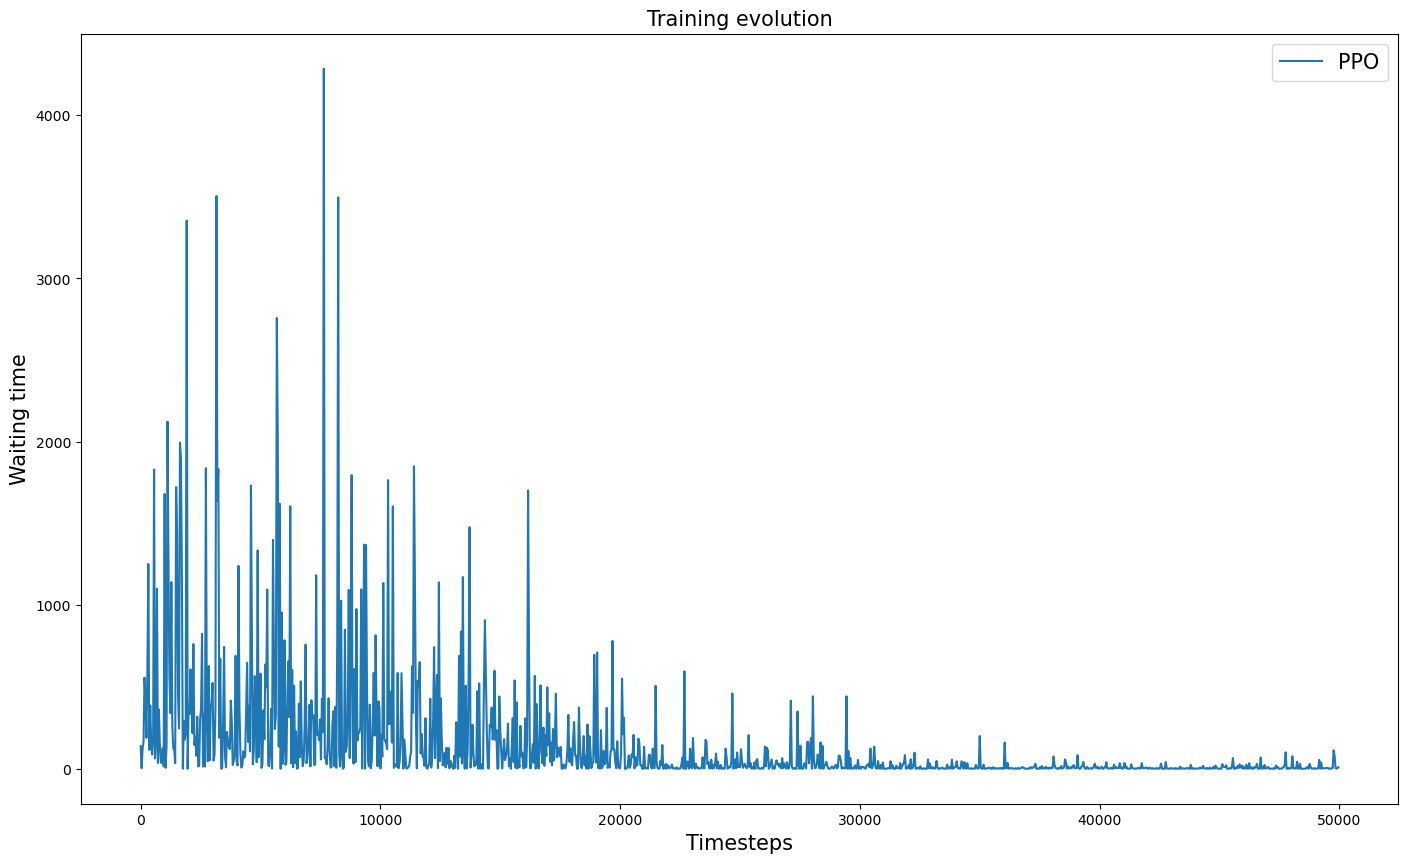

In [37]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()


# Plot the data
ax.plot(data_rand["timesteps"][:170],data_rand["reward"][:170],label="Random Agent")
ax.plot(data_ppo["timesteps"][:1250],data_ppo["reward"][:1250],label="PPO")
ax.plot(data_a2c["timesteps"][:714],data_a2c["reward"][:714],label="A2C")
#ax.plot(data_dqn["timesteps"][:1666],data_dqn["reward"][:1666],label="DQN")

# Add labels and title
plt.xlabel('Timesteps',fontsize=15)
plt.ylabel('Waiting time',fontsize=15)
plt.title("Training evolution",fontsize=15)
ax.legend(fontsize=15)
fig.set_size_inches(17, 10, forward=True)
#fig.savefig('speed3.png')
plt.show()